In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [12]:
from PIML.nn.dnn.dnnboxW import DnnBoxW

In [13]:
d = DnnBoxW()

In [14]:
W="RedM"; Rs=["R","B"]; Res=5000;step=10;
d.init_box(W,Rs, Res,step, topk=10, onPCA=1)

=============================PREPARING R=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)
error: 1.7844823053258816e-08
=============================PREPARING B=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [1.9403e+02 1.4640e+01 5.7500e+00 1.8700e+00 9.3000e-01 7.3000e-01
 6.0000e-01 3.4000e-01 2.4000e-01 1.7000e-01]
Building RBF with gaussan kernel on data shape (5760,)
Building RBF with gaussan kernel on data shape (5760, 10)
error: 3.176801454218257e-07


In [15]:
d.init_train(out_idx=[0,1,2], mtype="NoiseDNN", train_NL=2, nTrain=10000, nTest=100)

Layers: [20, 64, 32, 16, 3]
generating (10000, 20) training data for RHB
| EP 20 |loss: 0.0084 | mean_: 0.0084 | val_l: 0.0013 | val_m: 0.0013 | 
Layers: [20, 64, 32, 16, 3]
generating (10000, 20) training data for BHB
| EP 20 |loss: 0.0162 | mean_: 0.0162 | val_l: 0.0094 | val_m: 0.0094 | 


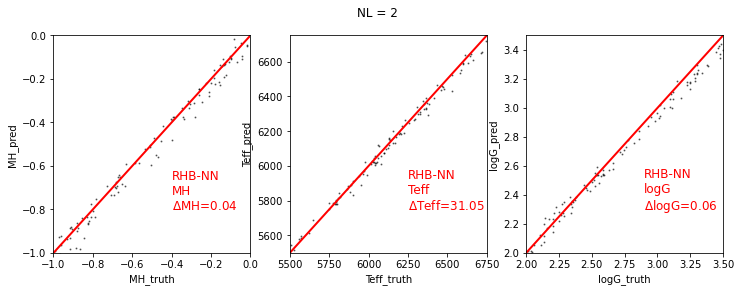

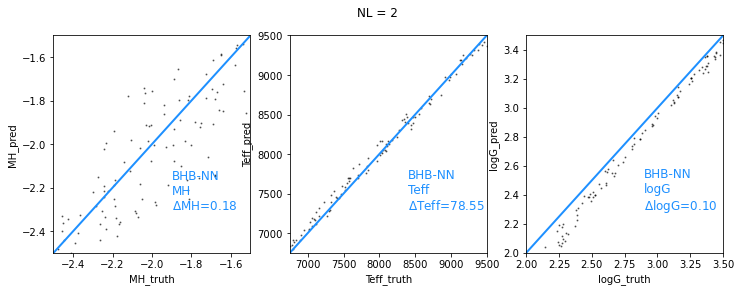

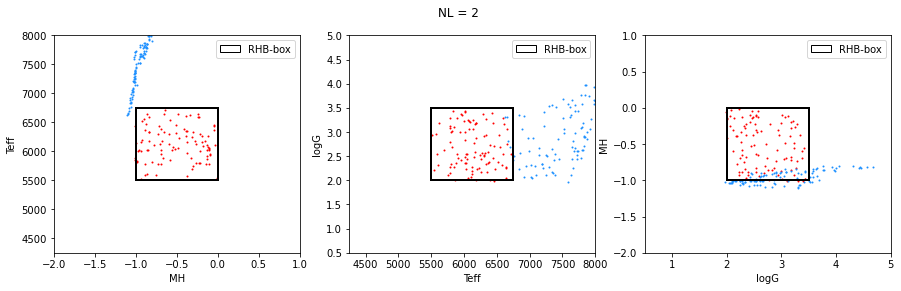

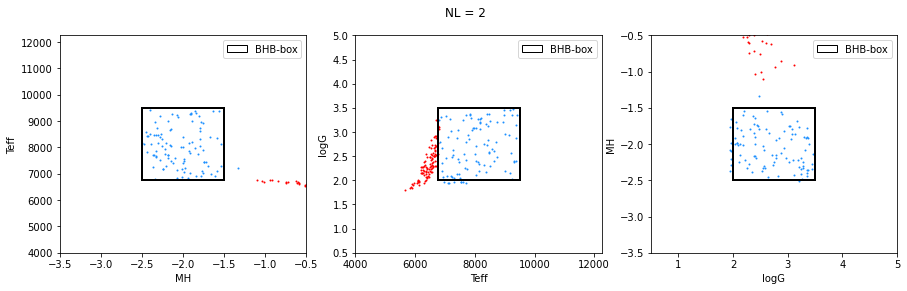

In [16]:
d.run(lr=0.01, dp=0.02, batch=16, nEpoch=20, verbose=0)

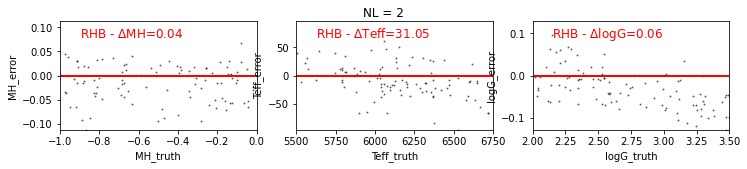

In [21]:
d.eval_acc_R0("R", vertical=1)

In [ ]:
d.nTest=1000

In [ ]:
d.x_test[R0]

array([[-1.97126282e+00, -6.52045563e-02, -9.80244365e-02, ...,
        -5.32569594e-02, -6.65486132e-02, -6.31573451e-03],
       [-2.16872699e+00, -4.28428667e-02,  1.03801656e-01, ...,
        -5.11579417e-02, -7.96557192e-02, -1.79817314e-03],
       [-1.83632136e+00, -3.76210082e-02, -6.34520713e-02, ...,
        -5.33402435e-02, -6.94188572e-02, -8.99314223e-04],
       ...,
       [-2.08885584e+00, -6.41744330e-02,  1.28041441e-01, ...,
        -4.17718182e-02, -6.86761275e-02,  1.37377687e-02],
       [-1.86900147e+00, -6.91545311e-03, -4.64819688e-02, ...,
        -6.30982993e-02, -8.25521956e-02, -5.64283496e-03],
       [-1.64653927e+00, -4.00668872e-02, -8.47633528e-02, ...,
        -5.11045829e-02, -6.16329104e-02,  2.47876447e-03]])

In [ ]:
d.p_pred[R0][R0]

array([[-2.40212381e-01,  6.05276282e+03,  3.00665012e+00],
       [-9.72911030e-01,  6.38723309e+03,  2.60603771e+00],
       [-4.13643718e-02,  5.82866731e+03,  2.88044646e+00],
       ...,
       [-2.50365257e-01,  6.13814856e+03,  2.79893002e+00],
       [-3.45417261e-02,  5.99381450e+03,  2.01349491e+00],
       [-7.03725219e-01,  6.28909315e+03,  3.37147632e+00]])

In [ ]:
d.p_test[R0]

array([[-2.68746449e-01,  6.22118059e+03,  3.39586484e+00],
       [-1.80964054e-01,  6.54552767e+03,  2.47615374e+00],
       [-7.54435746e-01,  5.92462496e+03,  2.56454706e+00],
       ...,
       [-8.54971202e-01,  6.44561097e+03,  2.01230575e+00],
       [-4.77144025e-01,  5.94713158e+03,  2.50249366e+00],
       [-8.48822343e-01,  5.60999642e+03,  2.00031622e+00]])

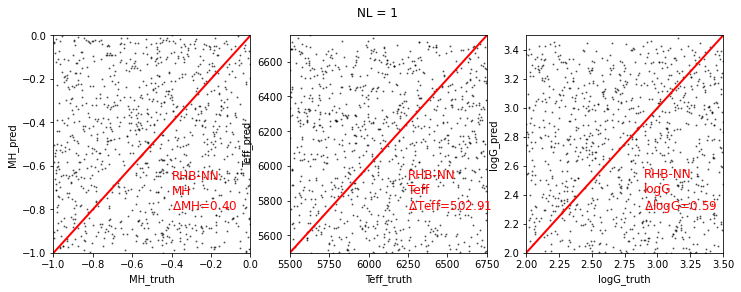

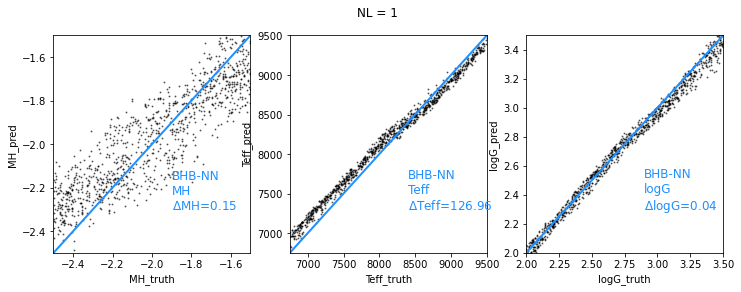

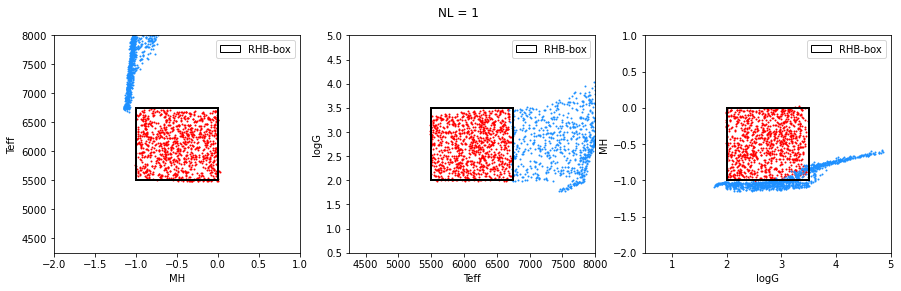

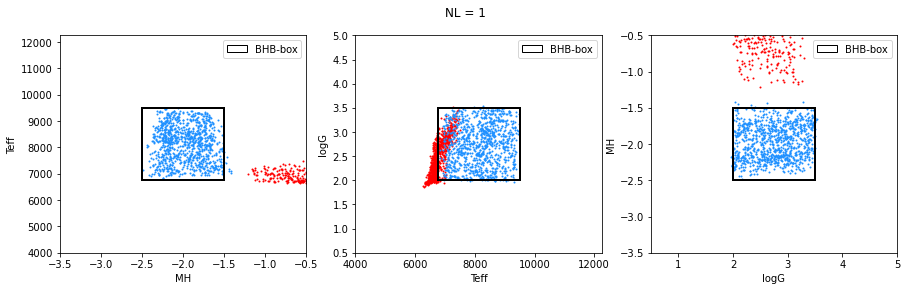

In [ ]:
d.test(new=1, noise_level=1)

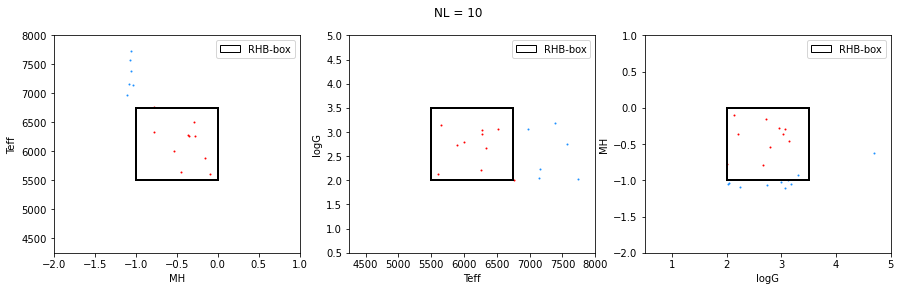

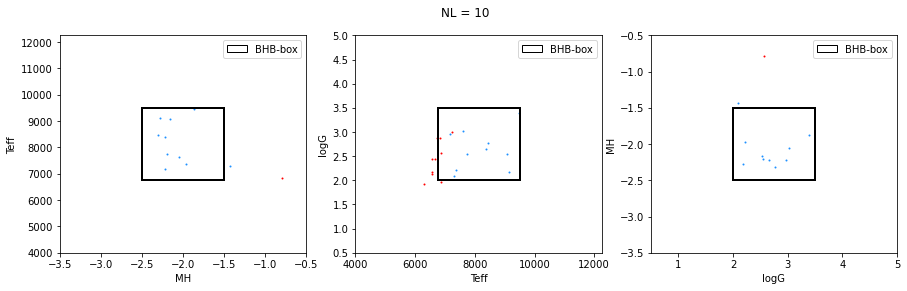

In [41]:
d.eval_box(n_box=1)

In [ ]:
NL=10

In [ ]:
pcflux, rands, pmts,= b.prepare_trainset(10, noise_level=NL, add_noise=1)

generating (10, 20) training data for RHB
generating (10, 20) training data for BHB


In [ ]:
pcflux0, rands, pmts,= b.prepare_trainset(10, noise_level=NL, add_noise=0, pmts=pmts)

generating (10, 20) training data for RHB
generating (10, 20) training data for BHB


In [ ]:
tx, tp = b.prepare_testset(10, noise_level=NL)

In [ ]:
R0 = "B"
pcflux0[R0][0][0], pcflux[R0][0]

(array([-2.58234961e+00, -4.10375554e-01,  5.53518213e-01,  1.47398790e-01,
         2.10851841e-02,  1.07199400e-01,  8.18364856e-02,  4.24131506e-02,
         6.77628516e-02, -8.48216282e-03, -2.66841570e+00,  2.70072075e-01,
         5.42803012e-02,  2.20932168e-02, -6.22379032e-04, -3.81962563e-04,
         9.98870953e-03, -2.35257077e-03, -1.46767059e-03,  3.12387435e-04]),
 array([-2.58177125e+00, -4.12622282e-01,  5.49984761e-01,  1.48805381e-01,
         2.14084629e-02,  1.11250132e-01,  8.34975248e-02,  4.16391667e-02,
         6.95797415e-02, -7.67040597e-03, -2.66782431e+00,  2.68806361e-01,
         5.67666619e-02,  2.59325129e-02, -1.40406415e-03, -1.41644925e-03,
         9.99030711e-03, -1.84681569e-03,  1.72828297e-04,  2.70661961e-03]))